Things to do: <br>
    1. Get Data <br>
    2. Merge dataframe<br>
    3. Normalisasi data <br>
    4. Visualize Lineplot (Seperated)<br>
    5. Visualize ScatterPlot <br>
    6. Visualize Lineplot (per month)<br>


# Get Data

In [15]:
import pandas as pd

SBUX = pd.read_csv('dataset_clean\\clean_stock_SBUX_ytd', sep=';')
SBUX['Date'] = pd.to_datetime(SBUX['Date'])
SBUX.set_index('Date', inplace= True)
SBUX.head(10)

,Open,High,Low,Close,Volume,diff
Date,,,,,,
2023-01-03,98.493532,99.090998,97.425935,98.757988,6607700,0.264456
2023-01-04,100.579769,102.577848,100.442646,102.313393,8166600,1.733624
2023-01-05,102.342761,102.940226,101.363311,102.283997,5575100,-0.058765
2023-01-06,103.214489,104.801201,102.852097,104.497574,9644100,1.283085
2023-01-09,104.331052,104.487767,102.284004,102.587631,10124800,-1.743420
2023-01-10,102.215449,104.242911,102.029351,103.821747,4183600,1.606298
2023-01-11,103.635649,104.252708,102.705174,104.115585,5634400,0.479936
2023-01-12,104.105780,104.252700,103.008793,103.674820,4882000,-0.430961
2023-01-13,102.910865,105.095043,102.910865,105.026482,5529700,2.115617


In [14]:
MCD = pd.read_csv('dataset_clean\\clean_stock_MCD_ytd', sep=';')
MCD['Date'] = pd.to_datetime(MCD['Date'])
MCD.set_index('Date', inplace=True)
MCD.head(10)

,Open,High,Low,Close,Volume,diff
Date,,,,,,
2023-01-03,259.239921,260.046580,255.285375,260.026886,2743800,0.786965
2023-01-04,261.915613,262.210717,258.610326,260.085907,2584100,-1.829706
2023-01-05,260.449892,260.449892,257.124911,257.892212,1945600,-2.557680
2023-01-06,259.466185,265.496397,259.102213,265.083221,2855400,5.617037
2023-01-09,265.535717,265.555411,262.427156,262.899353,2654600,-2.636364
2023-01-10,262.633775,264.719258,262.614081,264.532349,1718400,1.898574
2023-01-11,265.132393,265.348813,262.614071,264.433960,2391400,-0.698433
2023-01-12,265.112702,265.525878,261.856589,262.348450,1933000,-2.764252
2023-01-13,262.053363,264.571686,261.551656,264.512665,2168900,2.459302


# Merge DataFrame

In [22]:
SBUX_MCD = SBUX.merge(MCD, how= 'inner',left_index= True, right_index= True,suffixes=('_SBUX', '_MCD' ))
SBUX_MCD.head()

,Open_SBUX,High_SBUX,Low_SBUX,Close_SBUX,Volume_SBUX,diff_SBUX,Open_MCD,High_MCD,Low_MCD,Close_MCD,Volume_MCD,diff_MCD
Date,,,,,,,,,,,,
2023-01-03,98.493532,99.090998,97.425935,98.757988,6607700,0.264456,259.239921,260.046580,255.285375,260.026886,2743800,0.786965
2023-01-04,100.579769,102.577848,100.442646,102.313393,8166600,1.733624,261.915613,262.210717,258.610326,260.085907,2584100,-1.829706
2023-01-05,102.342761,102.940226,101.363311,102.283997,5575100,-0.058765,260.449892,260.449892,257.124911,257.892212,1945600,-2.557680
2023-01-06,103.214489,104.801201,102.852097,104.497574,9644100,1.283085,259.466185,265.496397,259.102213,265.083221,2855400,5.617037
2023-01-09,104.331052,104.487767,102.284004,102.587631,10124800,-1.743420,265.535717,265.555411,262.427156,262.899353,2654600,-2.636364


# Normalize Data

In [31]:
from sklearn.preprocessing import MinMaxScaler

column_to_scale = SBUX_MCD.columns[0:4].append(SBUX_MCD.columns[6:10])

scaler = MinMaxScaler(feature_range= (0,100))
SBUX_MCD[column_to_scale] = scaler.fit_transform(SBUX_MCD[column_to_scale])

SBUX_MCD[column_to_scale].head()

,Open_SBUX,High_SBUX,Low_SBUX,Close_SBUX,Open_MCD,High_MCD,Low_MCD,Close_MCD
Date,,,,,,,,
2023-01-03,39.032693,36.875245,36.660901,41.077333,25.152965,22.960291,19.902582,27.332544
2023-01-04,47.986332,51.968918,49.367938,56.030396,30.571809,27.382385,26.828012,27.449131
2023-01-05,55.552685,53.537559,53.245975,55.906764,27.603412,23.784399,23.734091,23.115838
2023-01-06,59.293935,61.593235,59.517061,65.216466,25.611196,34.096186,27.852547,37.320524
2023-01-09,64.085963,60.236461,57.124132,57.183768,37.903289,34.216771,34.777961,33.006642


# Visualize Starbucks and MCD

## Line Plot

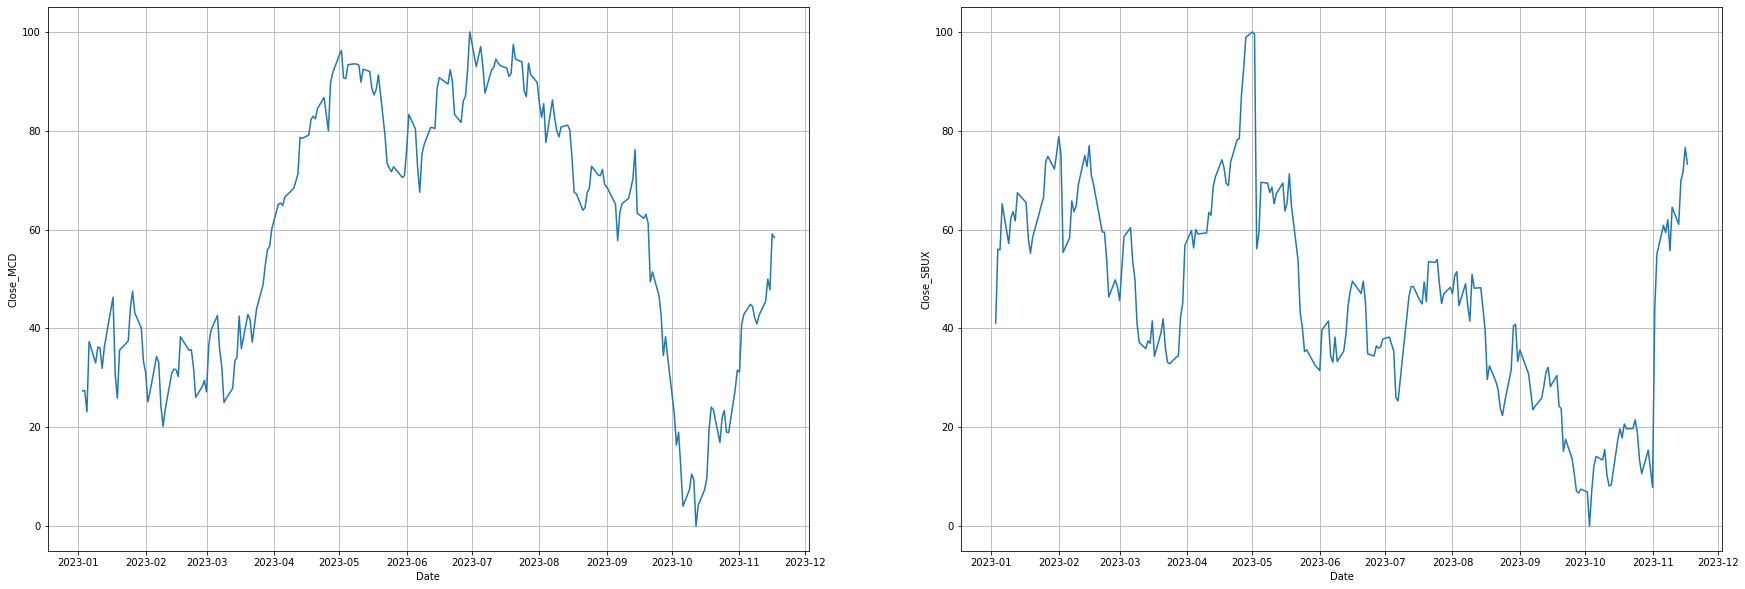

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize = (30,10))

plt.subplot(1,2,1)
sns.lineplot(x= SBUX_MCD.index, y=SBUX_MCD['Close_MCD'])
plt.grid()

plt.subplot(1,2,2)
sns.lineplot(x= SBUX_MCD.index, y=SBUX_MCD['Close_SBUX'])
plt.grid()

plt.show()

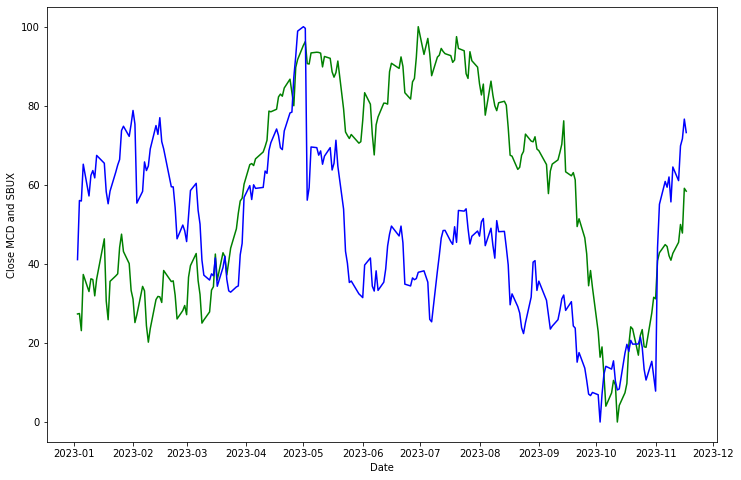

In [50]:
plt.figure(figsize=(12,8))

sns.lineplot(x= SBUX_MCD.index, y=SBUX_MCD['Close_MCD'], color= 'green')
sns.lineplot(x= SBUX_MCD.index, y=SBUX_MCD['Close_SBUX'],color= 'blue')

plt.ylabel('Close MCD and SBUX')
plt.show()

## Scatterplot

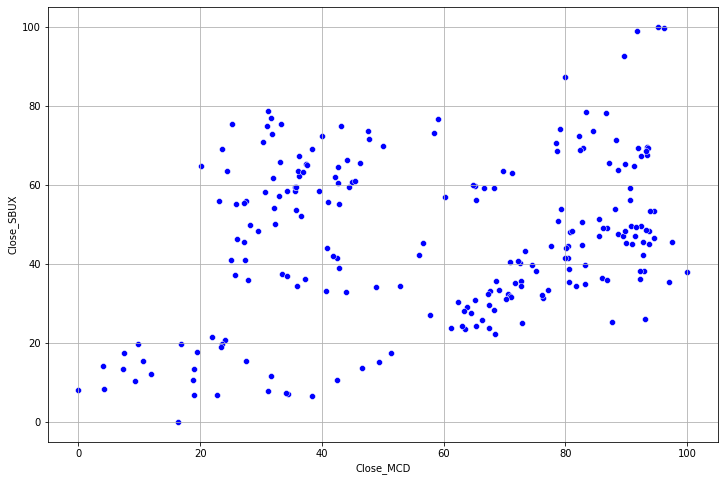

In [51]:
plt.figure(figsize=(12,8))

sns.scatterplot(data= SBUX_MCD, x='Close_MCD', y= 'Close_SBUX', color='blue')

plt.grid()
plt.show()

# Visualize SBUX and MCD (per Month)

In [52]:
Jan_Feb = SBUX_MCD.loc['2023-01-01':'2023-02-28']
Mar_April = SBUX_MCD.loc['2023-03-01':'2023-04-30']
May_June = SBUX_MCD.loc['2023-05-01':'2023-06-30']
Jul_Aug = SBUX_MCD.loc['2023-07-01':'2023-08-31']
Sep_Oct = SBUX_MCD.loc['2023-09-01':'2023-10-31']
Nov_Des = SBUX_MCD.loc['2023-11-01':'2023-12-31']

## LinePlot

In [54]:
plt.figure(figsize=(12,8))

sns.

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 42 and the vector passed to `y` has length 1.

<Figure size 864x576 with 0 Axes>